# Spaceship Titanic

In [68]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import time

In [69]:
X_train=pd.read_csv('./spaceship-titanic/train.csv')
X_test=pd.read_csv('./spaceship-titanic/test.csv')
submission=pd.read_csv('./spaceship-titanic/sample_submission.csv')

- 데이터확인
- 데이터전처리
- ML모델링
- 최적화 및 성능평가

In [70]:
X_train.shape, X_test.shape, submission.shape

((8693, 14), (4277, 13), (4277, 2))

In [71]:
X_train.head(5)

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

In [72]:
X_test.head(5)

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0013_01      Earth      True  G/3/S  TRAPPIST-1e  27.0  False   
1     0018_01      Earth     False  F/4/S  TRAPPIST-1e  19.0  False   
2     0019_01     Europa      True  C/0/S  55 Cancri e  31.0  False   
3     0021_01     Europa     False  C/1/S  TRAPPIST-1e  38.0  False   
4     0023_01      Earth     False  F/5/S  TRAPPIST-1e  20.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck              Name  
0          0.0        0.0           0.0     0.0     0.0   Nelly Carsoning  
1          0.0        9.0           0.0  2823.0     0.0    Lerome Peckers  
2          0.0        0.0           0.0     0.0     0.0   Sabih Unhearfus  
3          0.0     6652.0           0.0   181.0   585.0  Meratz Caltilter  
4         10.0        0.0         635.0     0.0     0.0   Brence Harperez

- train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
- PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
- CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- Destination - The planet the passenger will be debarking to.
- Age - The age of the passenger.
- VIP - Whether the passenger has paid for special VIP service during the voyage.
- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- Name - The first and last names of the passenger.
- Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

- PassengerId - Id for each passenger in the test set.
- Transported - The target. For each passenger, predict either True or False.



- PassengerId : gggg-pp 형식 gggg는 여행객 그룹 pp는 그 그룹 안 숫자, 종종 가족 아닐경우도 존재
- HomePlanet : 고향
- CryoSleep : 동면 시키기 그들의 캐빈 안에 갇힘
- Cabin : deck/num/side/  side_P side_S 가 존재
- Destination 목적지
- Age 나이
- VIP 서비스 차지여부
- RoomService 룸서비스 사용금액 총합
- Name 이름
- Transported 전송

In [73]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


**수치형 특성 탐색**

In [74]:
X_train.describe()

Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000

**범주형 특성 탐색**

In [75]:
X_train.describe(include=('object','bool'))

PassengerId HomePlanet CryoSleep    Cabin  Destination    VIP  \
count         8693       8492      8476     8494         8511   8490   
unique        8693          3         2     6560            3      2   
top        0001_01      Earth     False  G/734/S  TRAPPIST-1e  False   
freq             1       4602      5439        8         5915   8291   

                  Name Transported  
count             8493        8693  
unique            8473           2  
top     Gollux Reedall        True  
freq                 2        4378

In [76]:
X_train[X_train.Transported==True]['VIP'].value_counts()

False    4198
True       76
Name: VIP, dtype: int64

In [77]:
X_train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [78]:
for i,k in enumerate(X_train.dtypes):
    if k=='object':
        print(X_train.columns[i])

PassengerId
HomePlanet
CryoSleep
Cabin
Destination
VIP
Name


In [79]:
icd_lb_idx=[]
icd_lb_list=[]
for k,i in enumerate(X_train.columns) :
    #print(i)
    #print(X_train[i].nunique())
    if X_train[i].nunique()<10:
        icd_lb_idx.append(k)
        icd_lb_list.append(i)
    #print('-----------')
    
# 1,2,4,6, -1 은 원핫 인코딩 or 라벨링 13은 타겟이므로 제거해야함
print(icd_lb_idx)
print(icd_lb_list)

[1, 2, 4, 6, 13]
['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported']


In [80]:
X_train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [81]:
X_train[X_train.CryoSleep.isna()]

PassengerId HomePlanet CryoSleep     Cabin  Destination   Age    VIP  \
92       0099_02      Earth       NaN    G/12/P  TRAPPIST-1e   2.0  False   
98       0105_01      Earth       NaN    F/21/P  TRAPPIST-1e  27.0  False   
104      0110_02     Europa       NaN     B/5/P  TRAPPIST-1e  40.0  False   
111      0115_01       Mars       NaN    F/24/P  TRAPPIST-1e  26.0  False   
152      0173_01      Earth       NaN    E/11/S  TRAPPIST-1e  58.0  False   
...          ...        ...       ...       ...          ...   ...    ...   
8620     9197_01     Europa       NaN   C/308/P  55 Cancri e  44.0  False   
8651     9227_05      Earth       NaN  G/1498/P  TRAPPIST-1e   8.0  False   
8664     9246_01      Earth       NaN  G/1490/S  TRAPPIST-1e  32.0  False   
8675     9259_01      Earth       NaN  F/1893/P  TRAPPIST-1e  44.0  False   
8687     9275_03     Europa       NaN    A/97/P  TRAPPIST-1e  30.0  False   

      RoomService  FoodCourt  ShoppingMall   Spa  VRDeck              Name  \
92            0.0        0.0           0.0   0.0     0.0  Thewis Connelson   
98            0.0        0.0         570.0   2.0   131.0  Carry Cleachrand   
104           0.0      331.0           0.0   0.0  1687.0   Aldeba Bootious   
111           0.0        0.0           0.0   0.0     NaN         Rohs Pead   
152           0.0      985.0           0.0   5.0     0.0    Hilip Grifford   
...           ...        ...           ...   ...     ...               ...   
8620          0.0        0.0           0.0   0.0     0.0     Bellus Platch   
8651          0.0        0.0           0.0   0.0     0.0   Hard Hinglendez   
8664          0.0        0.0           0.0   0.0     0.0               NaN   
8675       1030.0     1015.0           0.0  11.0     NaN   Annah Gilleyons   
8687          0.0     3208.0           0.0   2.0   330.0   Atlasym Conable   

      Transported  
92           True  
98          False  
104         False  
111          True  
152          True  
...           ...  
8620         True  
8651        False  
8664         True  
8675         True  
8687         True  

[217 rows x 14 columns]

In [82]:
X_train.duplicated().sum()

0

In [83]:
X_test.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [84]:
X_test.duplicated().sum()

0

## 수치형 데이터 히스토그램

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RoomService'}>],
       [<AxesSubplot:title={'center':'FoodCourt'}>,
        <AxesSubplot:title={'center':'ShoppingMall'}>],
       [<AxesSubplot:title={'center':'Spa'}>,
        <AxesSubplot:title={'center':'VRDeck'}>]], dtype=object)

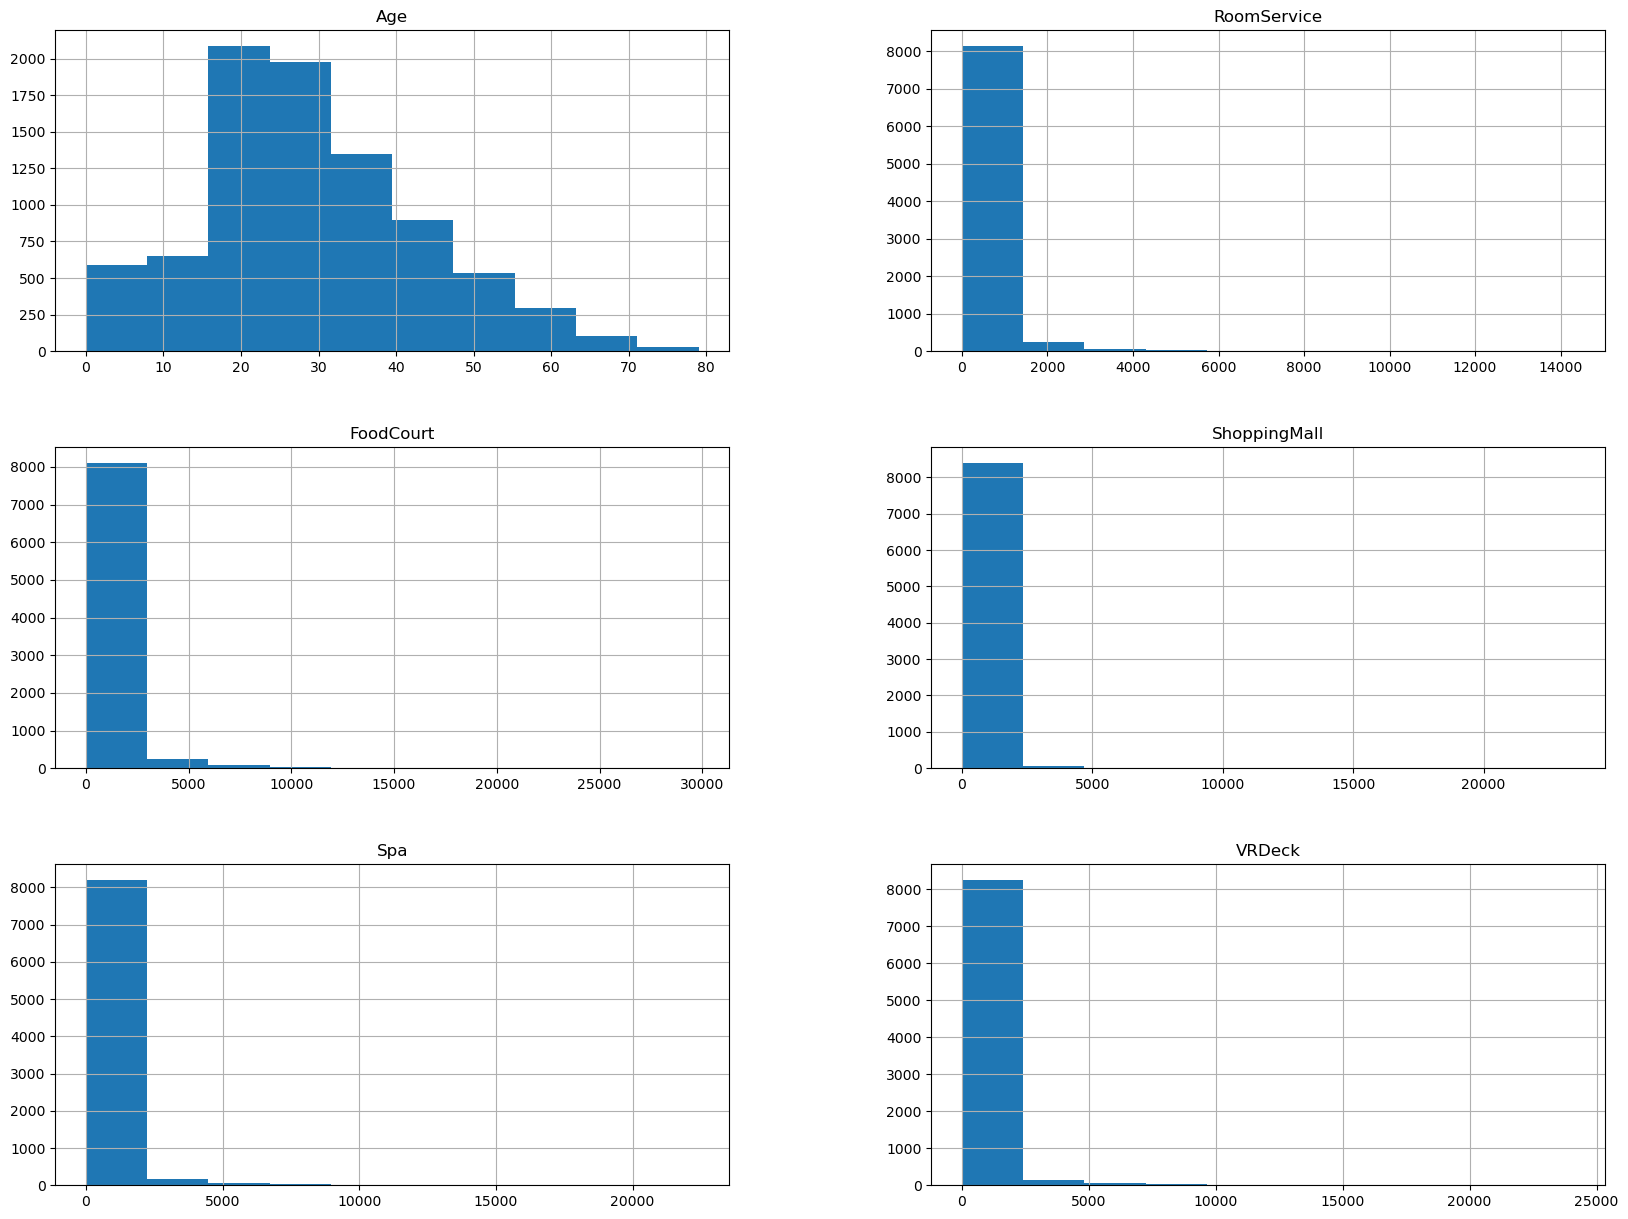

In [85]:
X_train.hist(bins=10,figsize=(20,15))

## 범주형 데이터 막대

In [86]:
icd_lb_list

['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported']

In [87]:
X_train['HomePlanet'].value_counts()/X_train[i].count()*100

Earth     52.939146
Europa    24.513977
Mars      20.234672
Name: HomePlanet, dtype: float64

<AxesSubplot:ylabel='HomePlanet'>

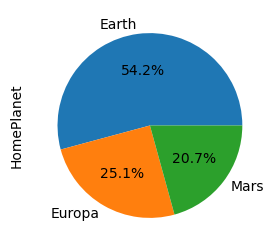

In [88]:
X_train['HomePlanet'].value_counts().plot.pie(autopct="%1.1f%%",figsize=(3,3))

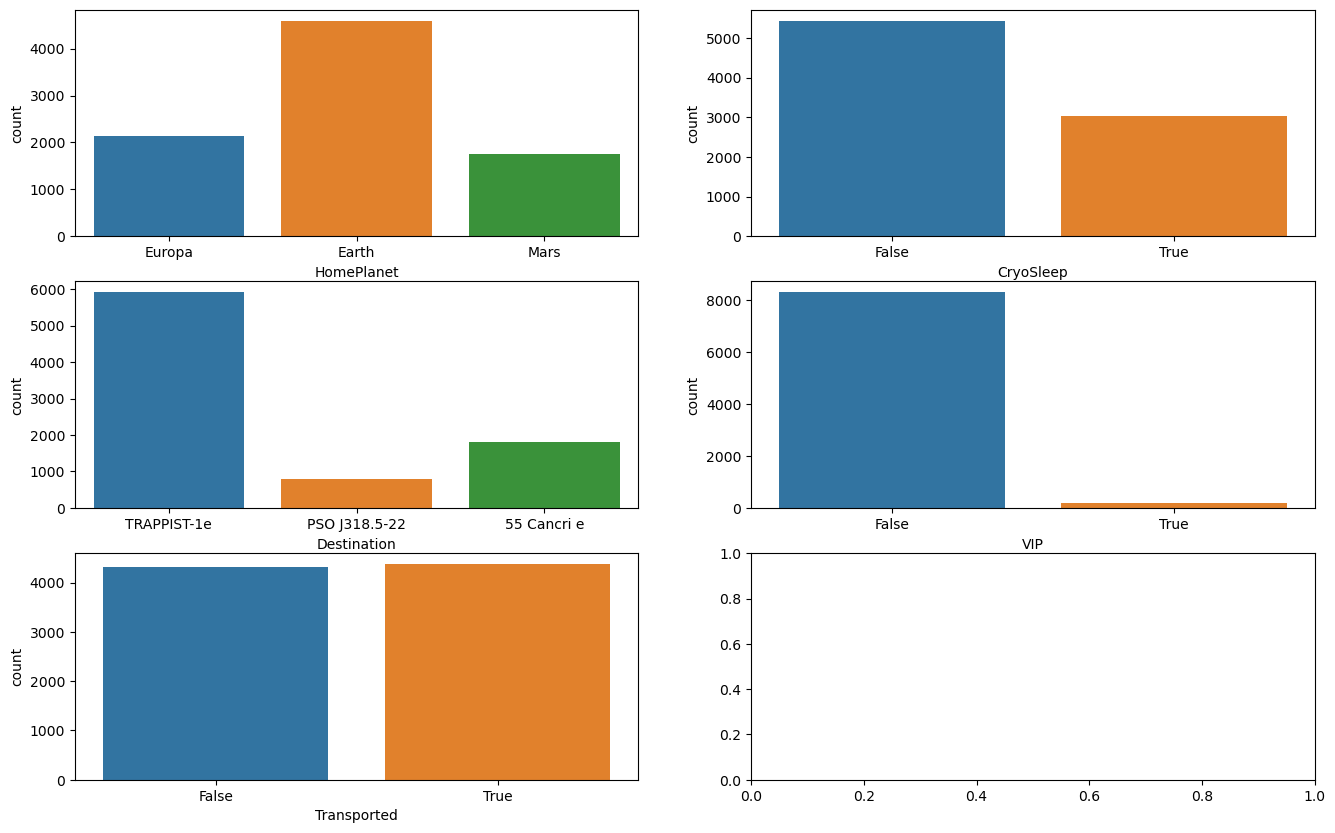

In [89]:
fig, axes = plt.subplots(3, 2, figsize=(16, 10))
for i, ax in zip(icd_lb_list, axes.flat):
    sns.countplot(data=X_train,x=i, ax=ax)
plt.show()

In [90]:
t1=X_train[~X_train['Cabin'].isnull()]
t1.Cabin.isna().sum()
t1

PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
8688     9276_01     Europa     False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0             0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1           109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2            43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3             0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4           303.0       70.0         151.0   565.0     2.0  Willy Santantines   
...           ...        ...           ...     ...     ...                ...   
8688          0.0     6819.0           0.0  1643.0    74.0  Gravior Noxnuther   
8689          0.0        0.0           0.0     0.0     0.0    Kurta Mondalley   
8690          0.0        0.0        1872.0     1.0     0.0       Fayey Connon   
8691          0.0     1049.0           0.0   353.0  3235.0   Celeon Hontichre   
8692        126.0     4688.0           0.0     0.0    12.0   Propsh Hontichre   

      Transported  
0           False  
1            True  
2           False  
3           False  
4            True  
...           ...  
8688        False  
8689        False  
8690         True  
8691        False  
8692         True  

[8494 rows x 14 columns]

**캐빈값을F/B으로 나누었음**

In [91]:
t1['front']=t1.Cabin.map(lambda x: x[0])
t1['back']=t1.Cabin.map(lambda x: x[-1])
t1['total']=t1.Cabin.map(lambda x: x[0]+x[-1])
# 빈도수는 F , G , E , B,C,D, A 순

In [92]:
t1

PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
8688     9276_01     Europa     False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0             0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1           109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2            43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3             0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4           303.0       70.0         151.0   565.0     2.0  Willy Santantines   
...           ...        ...           ...     ...     ...                ...   
8688          0.0     6819.0           0.0  1643.0    74.0  Gravior Noxnuther   
8689          0.0        0.0           0.0     0.0     0.0    Kurta Mondalley   
8690          0.0        0.0        1872.0     1.0     0.0       Fayey Connon   
8691          0.0     1049.0           0.0   353.0  3235.0   Celeon Hontichre   
8692        126.0     4688.0           0.0     0.0    12.0   Propsh Hontichre   

      Transported front back total  
0           False     B    P    BP  
1            True     F    S    FS  
2           False     A    S    AS  
3           False     A    S    AS  
4            True     F    S    FS  
...           ...   ...  ...   ...  
8688        False     A    P    AP  
8689        False     G    S    GS  
8690         True     G    S    GS  
8691        False     E    S    ES  
8692         True     E    S    ES  

[8494 rows x 17 columns]

In [93]:
t1.groupby('total').mean()['Transported'].sort_values(ascending=False)


total
BS    0.784038
CS    0.763547
BP    0.674221
GS    0.583788
CP    0.580645
AS    0.546763
FS    0.470501
DS    0.465217
GP    0.448276
AP    0.435897
FP    0.410987
DP    0.403226
ES    0.371365
EP    0.342657
TP    0.250000
TS    0.000000
Name: Transported, dtype: float64

In [94]:
t1.groupby('front').mean()['Transported'].sort_values(ascending=False)
#생존률은 B,C,G,A,F,D,E,T

front
B    0.734275
C    0.680054
G    0.516217
A    0.496094
F    0.439871
D    0.433054
E    0.357306
T    0.200000
Name: Transported, dtype: float64

In [95]:
t1[t1.front=='B'].groupby('back').mean()['Transported']

back
P    0.674221
S    0.784038
Name: Transported, dtype: float64

In [96]:
t1.groupby('back').mean()['Transported']


back
P    0.451260
S    0.555037
Name: Transported, dtype: float64

<AxesSubplot:>

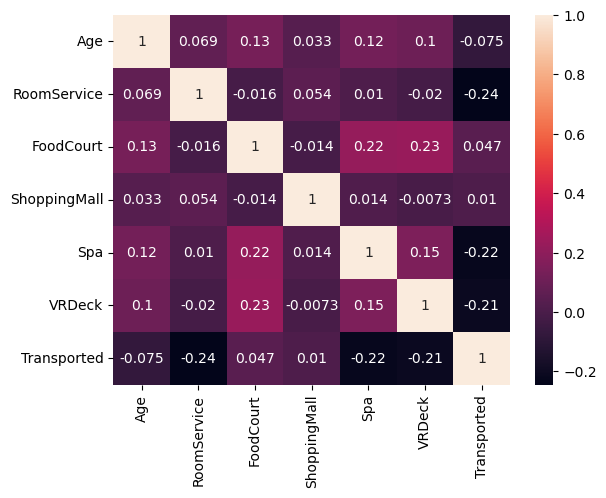

In [97]:
sns.heatmap(X_train.corr(),annot=True)

## 데이터 전처리

**결측치 채우기**

In [98]:
# X,y분리

In [99]:
y_train=X_train.iloc[:,-1].copy()
#X_train.drop(['Transported'],axis=1,inplace=True)

In [100]:
X_train["Group"] = X_train['PassengerId'].apply(lambda x: x.split("_")[0])
X_test["Group"] = X_test['PassengerId'].apply(lambda x: x.split("_")[0])
X_train["GroupSize"] = X_train['PassengerId'].apply(lambda x: int(x.split("_")[1]))
X_test["GroupSize"] = X_test['PassengerId'].apply(lambda x: int(x.split("_")[1]))

In [101]:
X_train

PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
8688     9276_01     Europa     False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0             0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1           109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2            43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3             0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4           303.0       70.0         151.0   565.0     2.0  Willy Santantines   
...           ...        ...           ...     ...     ...                ...   
8688          0.0     6819.0           0.0  1643.0    74.0  Gravior Noxnuther   
8689          0.0        0.0           0.0     0.0     0.0    Kurta Mondalley   
8690          0.0        0.0        1872.0     1.0     0.0       Fayey Connon   
8691          0.0     1049.0           0.0   353.0  3235.0   Celeon Hontichre   
8692        126.0     4688.0           0.0     0.0    12.0   Propsh Hontichre   

      Transported Group  GroupSize  
0           False  0001          1  
1            True  0002          1  
2           False  0003          1  
3           False  0003          2  
4            True  0004          1  
...           ...   ...        ...  
8688        False  9276          1  
8689        False  9278          1  
8690         True  9279          1  
8691        False  9280          1  
8692         True  9280          2  

[8693 rows x 16 columns]

In [102]:
X_train[~X_train['Cabin'].isnull()].Cabin.map(lambda x: x[0]).value_counts()
X_train[~X_train['Cabin'].isnull()].Cabin.map(lambda x: x[-1]).value_counts()

S    4288
P    4206
Name: Cabin, dtype: int64

- Cabin - `The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

In [103]:
X_train['Cabin'].fillna('XXX',inplace=True)
X_test['Cabin'].fillna('XXX',inplace=True)
X_train["Front"] = X_train['Cabin'].apply(lambda x: x[0])
X_train["Back"] = X_train['Cabin'].apply(lambda x: x[-1])
X_test["Front"] = X_test['Cabin'].apply(lambda x: x[0])
X_test["Back"] = X_test['Cabin'].apply(lambda x: x[-1])
X_train

PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
8688     9276_01     Europa     False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0             0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1           109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2            43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3             0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4           303.0       70.0         151.0   565.0     2.0  Willy Santantines   
...           ...        ...           ...     ...     ...                ...   
8688          0.0     6819.0           0.0  1643.0    74.0  Gravior Noxnuther   
8689          0.0        0.0           0.0     0.0     0.0    Kurta Mondalley   
8690          0.0        0.0        1872.0     1.0     0.0       Fayey Connon   
8691          0.0     1049.0           0.0   353.0  3235.0   Celeon Hontichre   
8692        126.0     4688.0           0.0     0.0    12.0   Propsh Hontichre   

      Transported Group  GroupSize Front Back  
0           False  0001          1     B    P  
1            True  0002          1     F    S  
2           False  0003          1     A    S  
3           False  0003          2     A    S  
4            True  0004          1     F    S  
...           ...   ...        ...   ...  ...  
8688        False  9276          1     A    P  
8689        False  9278          1     G    S  
8690         True  9279          1     G    S  
8691        False  9280          1     E    S  
8692         True  9280          2     E    S  

[8693 rows x 18 columns]

In [104]:
X_test.Cabin.isna().sum()  # XXX는 노이즈값 

0

In [105]:
a=[]
for i,k in enumerate(X_train.dtypes):
    if k=='object':
        a.append(X_train.columns[i])
a

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'VIP',
 'Name',
 'Group',
 'Front',
 'Back']

**object 값 나머지는 프리퀀시로 결측값 채우기**

In [106]:
for i in a:
    X_train[i].fillna(X_train[i].value_counts().idxmax(),inplace=True)
X_train.isna().sum()


PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age             179
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name              0
Transported       0
Group             0
GroupSize         0
Front             0
Back              0
dtype: int64

In [107]:
for i in a:
    X_test[i].fillna(X_test[i].value_counts().idxmax(),inplace=True)
X_test.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age              91
VIP               0
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name              0
Group             0
GroupSize         0
Front             0
Back              0
dtype: int64

In [108]:
a=[]
for i,k in enumerate(X_train.dtypes):
    if k=='float':
        a.append(X_train.columns[i])
a

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [109]:
for i in a :
    print(i,X_train[i].median())


Age 27.0
RoomService 0.0
FoodCourt 0.0
ShoppingMall 0.0
Spa 0.0
VRDeck 0.0


In [110]:
for i in a:
    X_train[i].fillna(X_train[i].mean(),inplace=True) 

In [111]:
X_train.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
Group           0
GroupSize       0
Front           0
Back            0
dtype: int64

In [112]:
for i in a:
    X_test[i].fillna(X_test[i].mean(),inplace=True) 

In [113]:
X_test.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Group           0
GroupSize       0
Front           0
Back            0
dtype: int64

In [114]:
X_train['Front'].replace('X',X_train['Front'].value_counts().idxmax(),inplace=True)
X_train['Back'].replace('X',X_train['Back'].value_counts().idxmax(),inplace=True)
X_test['Front'].replace('X',X_test['Front'].value_counts().idxmax(),inplace=True)
X_test['Back'].replace('X',X_test['Back'].value_counts().idxmax(),inplace=True)

In [115]:
bins=[0,9,19,29,39,49,59,69,79]
labels=['0s','10s','20s','30s','40s','50s','60s','70s']
X_train['AgeCat']=pd.cut(X_train.Age,bins=bins,labels=labels)
X_test['AgeCat']=pd.cut(X_test.Age,bins=bins,labels=labels)

In [116]:
X_train['TotalSpent']=X_train.RoomService+X_train.FoodCourt+X_train.ShoppingMall+X_train.Spa+X_train.VRDeck
X_test['TotalSpent']=X_test.RoomService+X_test.FoodCourt+X_test.ShoppingMall+X_test.Spa+X_test.VRDeck

bins=[-1,727,1461,5000,10000,20000,35987]
labels=['a','b','c','d','e','f']
X_train['ToCat']=pd.cut(X_train.TotalSpent,bins=bins,labels=labels)
X_test['ToCat']=pd.cut(X_test.TotalSpent,bins=bins,labels=labels)


In [117]:
X_train

PassengerId HomePlanet  CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa      False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth      False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa      False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa      False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth      False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...        ...       ...            ...   ...    ...   
8688     9276_01     Europa      False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth       True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth      False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa      False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa      False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService  FoodCourt  ShoppingMall  ...  VRDeck               Name  \
0             0.0        0.0           0.0  ...     0.0    Maham Ofracculy   
1           109.0        9.0          25.0  ...    44.0       Juanna Vines   
2            43.0     3576.0           0.0  ...    49.0      Altark Susent   
3             0.0     1283.0         371.0  ...   193.0       Solam Susent   
4           303.0       70.0         151.0  ...     2.0  Willy Santantines   
...           ...        ...           ...  ...     ...                ...   
8688          0.0     6819.0           0.0  ...    74.0  Gravior Noxnuther   
8689          0.0        0.0           0.0  ...     0.0    Kurta Mondalley   
8690          0.0        0.0        1872.0  ...     0.0       Fayey Connon   
8691          0.0     1049.0           0.0  ...  3235.0   Celeon Hontichre   
8692        126.0     4688.0           0.0  ...    12.0   Propsh Hontichre   

     Transported  Group GroupSize  Front Back AgeCat TotalSpent  ToCat  
0          False   0001         1      B    P    30s        0.0      a  
1           True   0002         1      F    S    20s      736.0      b  
2          False   0003         1      A    S    50s    10383.0      e  
3          False   0003         2      A    S    30s     5176.0      d  
4           True   0004         1      F    S    10s     1091.0      b  
...          ...    ...       ...    ...  ...    ...        ...    ...  
8688       False   9276         1      A    P    40s     8536.0      d  
8689       False   9278         1      G    S    10s        0.0      a  
8690        True   9279         1      G    S    20s     1873.0      c  
8691       False   9280         1      E    S    30s     4637.0      c  
8692        True   9280         2      E    S    40s     4826.0      c  

[8693 rows x 21 columns]

In [118]:
X_train.corr()

CryoSleep       Age       VIP  RoomService  FoodCourt  \
CryoSleep      1.000000 -0.070736 -0.078281    -0.243986  -0.205682   
Age           -0.070736  1.000000  0.091574     0.067612   0.127937   
VIP           -0.078281  0.091574  1.000000     0.056595   0.126006   
RoomService   -0.243986  0.067612  0.056595     1.000000  -0.015521   
FoodCourt     -0.205682  0.127937  0.126006    -0.015521   1.000000   
ShoppingMall  -0.206366  0.032655  0.018483     0.052962  -0.013934   
Spa           -0.198392  0.120992  0.060573     0.009925   0.220587   
VRDeck        -0.193107  0.099210  0.123092    -0.019207   0.224275   
Transported    0.460132 -0.074249 -0.037261    -0.242048   0.046074   
GroupSize      0.063291 -0.131425  0.000703    -0.022360   0.023136   
TotalSpent    -0.376500  0.184509  0.163187     0.234303   0.742208   

              ShoppingMall       Spa    VRDeck  Transported  GroupSize  \
CryoSleep        -0.206366 -0.198392 -0.193107     0.460132   0.063291   
Age               0.032655  0.120992  0.099210    -0.074249  -0.131425   
VIP               0.018483  0.060573  0.123092    -0.037261   0.000703   
RoomService       0.052962  0.009925 -0.019207    -0.242048  -0.022360   
FoodCourt        -0.013934  0.220587  0.224275     0.046074   0.023136   
ShoppingMall      1.000000  0.013678 -0.007189     0.010019  -0.038388   
Spa               0.013678  1.000000  0.147957    -0.218791   0.016637   
VRDeck           -0.007189  0.147957  1.000000    -0.204825   0.009948   
Transported       0.010019 -0.218791 -0.204825     1.000000   0.066390   
GroupSize        -0.038388  0.016637  0.009948     0.066390   1.000000   
TotalSpent        0.220498  0.592439  0.585835    -0.199445   0.010424   

              TotalSpent  
CryoSleep      -0.376500  
Age             0.184509  
VIP             0.163187  
RoomService     0.234303  
FoodCourt       0.742208  
ShoppingMall    0.220498  
Spa             0.592439  
VRDeck          0.585835  
Transported    -0.199445  
GroupSize       0.010424  
TotalSpent      1.000000

##  데이터 탐색

In [119]:
X_train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'Group', 'GroupSize', 'Front', 'Back', 'AgeCat',
       'TotalSpent', 'ToCat'],
      dtype='object')

**생존률에 따른 그래프**

<AxesSubplot:xlabel='ToCat', ylabel='Transported'>

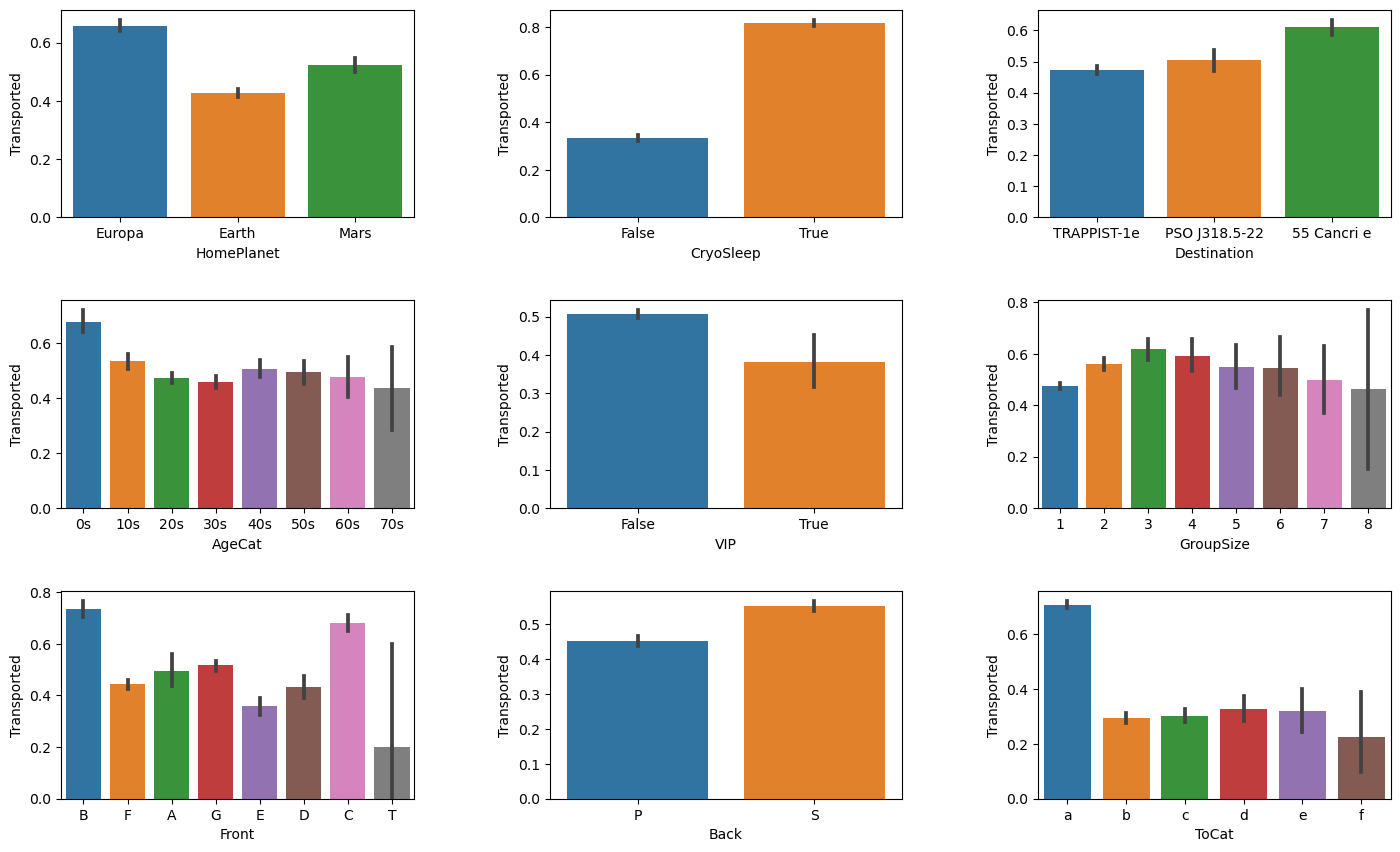

In [120]:
figure, axes = plt.subplots(nrows=3, ncols=3)
plt.tight_layout()
figure.set_size_inches(15, 9)
sns.barplot(data=X_train,x='HomePlanet',y='Transported',ax=axes[0][0])
sns.barplot(data=X_train,x='CryoSleep',y='Transported',ax=axes[0][1])
sns.barplot(data=X_train,x='Destination',y='Transported',ax=axes[0][2])
sns.barplot(data=X_train,x='AgeCat',y='Transported',ax=axes[1][0])
sns.barplot(data=X_train,x='VIP',y='Transported',ax=axes[1][1])
sns.barplot(data=X_train,x='GroupSize',y='Transported',ax=axes[1][2])
sns.barplot(data=X_train,x='Front',y='Transported',ax=axes[2][0])
sns.barplot(data=X_train,x='Back',y='Transported',ax=axes[2][1])
sns.barplot(data=X_train,x='ToCat',y='Transported',ax=axes[2][2])


In [121]:
X_train.groupby(['ToCat','VIP']).mean()['Transported']

ToCat  VIP  
a      False    0.705419
       True     0.896552
b      False    0.295518
       True     0.161290
c      False    0.300824
       True     0.316456
d      False    0.326923
       True     0.342105
e      False    0.325926
       True     0.277778
f      False    0.185185
       True     0.500000
Name: Transported, dtype: float64

In [122]:
X_train.groupby(['Front','VIP']).mean()['Transported']

Front  VIP  
A      False    0.520362
       True     0.342857
B      False    0.746269
       True     0.523810
C      False    0.682720
       True     0.634146
D      False    0.449664
       True     0.193548
E      False    0.358885
       True     0.266667
F      False    0.447262
       True     0.171429
G      False    0.516217
T      False    0.200000
Name: Transported, dtype: float64

In [123]:
X_train[X_train['VIP']==True]['Front'].value_counts()

B    42
C    41
A    35
F    35
D    31
E    15
Name: Front, dtype: int64

In [124]:
X_train[X_train['VIP']==False]['Front'].value_counts()

F    2958
G    2559
E     861
B     737
C     706
D     447
A     221
T       5
Name: Front, dtype: int64

<AxesSubplot:>

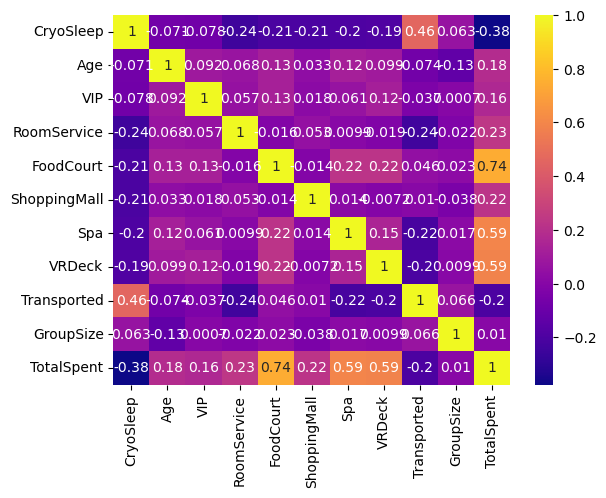

In [125]:
sns.heatmap(X_train.corr(),cmap='plasma',annot=True)

In [126]:
X_train

PassengerId HomePlanet  CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa      False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth      False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa      False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa      False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth      False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...        ...       ...            ...   ...    ...   
8688     9276_01     Europa      False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth       True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth      False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa      False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa      False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService  FoodCourt  ShoppingMall  ...  VRDeck               Name  \
0             0.0        0.0           0.0  ...     0.0    Maham Ofracculy   
1           109.0        9.0          25.0  ...    44.0       Juanna Vines   
2            43.0     3576.0           0.0  ...    49.0      Altark Susent   
3             0.0     1283.0         371.0  ...   193.0       Solam Susent   
4           303.0       70.0         151.0  ...     2.0  Willy Santantines   
...           ...        ...           ...  ...     ...                ...   
8688          0.0     6819.0           0.0  ...    74.0  Gravior Noxnuther   
8689          0.0        0.0           0.0  ...     0.0    Kurta Mondalley   
8690          0.0        0.0        1872.0  ...     0.0       Fayey Connon   
8691          0.0     1049.0           0.0  ...  3235.0   Celeon Hontichre   
8692        126.0     4688.0           0.0  ...    12.0   Propsh Hontichre   

     Transported  Group GroupSize  Front Back AgeCat TotalSpent  ToCat  
0          False   0001         1      B    P    30s        0.0      a  
1           True   0002         1      F    S    20s      736.0      b  
2          False   0003         1      A    S    50s    10383.0      e  
3          False   0003         2      A    S    30s     5176.0      d  
4           True   0004         1      F    S    10s     1091.0      b  
...          ...    ...       ...    ...  ...    ...        ...    ...  
8688       False   9276         1      A    P    40s     8536.0      d  
8689       False   9278         1      G    S    10s        0.0      a  
8690        True   9279         1      G    S    20s     1873.0      c  
8691       False   9280         1      E    S    30s     4637.0      c  
8692        True   9280         2      E    S    40s     4826.0      c  

[8693 rows x 21 columns]

## 나만의 변환기 만들기 

In [127]:
#결측기 채울시
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline 
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

In [128]:
X=pd.read_csv('./spaceship-titanic/train.csv')

In [129]:
def prepro(X):
    a=cabin_split(X)
    b=pass_split(X)
    c=pd.concat([X,a,b],axis=1)
    d=fillna_s(c,split_numeric(c))
    d.GroupSize=d.GroupSize.astype('float')
    d['total']=d.RoomService+d.FoodCourt+d.ShoppingMall+d.Spa+d.VRDeck
    droplist=['PassengerId','Cabin','Name','Transported','Group']
    d.drop(droplist,axis=1,inplace=True)
    return d

In [130]:
def split_numeric(X):
    numeric_list=[]
    not_numeric_list=[]
    nu_notnu=[]
    for i,v in enumerate(X.dtypes):
        if v=='int32' or v== 'float':
            numeric_list.append(X.columns[i])
        else:
            not_numeric_list.append(X.columns[i])
    nu_notnu.append(numeric_list)
    nu_notnu.append(not_numeric_list)
    return nu_notnu 

# SimpleImputer를 결측값을 대체(옵션3) 할 수 있음
from sklearn.impute import SimpleImputer

def fillna_s(X,nu_notnu):
    imputer = SimpleImputer(missing_values=np.nan,strategy='median') # 변환기 객체 생성
    npa1=imputer.fit_transform(X[nu_notnu[0]]) # 변환할 준비 : 중앙값을 구함
    time.sleep(1)
    imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent') # 변환기 객체 생성
    npa2=imputer.fit_transform(X[nu_notnu[1]]) #변환기 객체
    c=pd.concat([pd.DataFrame(npa1,columns=nu_notnu[0]),pd.DataFrame(npa2,columns=nu_notnu[1])],axis=1)
    c=c[X.columns]
    return c

#함수로 캐빈 , 패신저 아이디 쪼개기 
def cabin_split(X):
    X.Cabin=X.Cabin.fillna('XXX')
    df1=X.Cabin.apply(lambda x: x[-1])
    df2=X.Cabin.apply(lambda x: x[0])  
    df3=pd.concat([df2,df1],axis=1)
    df3.columns=['Front','Back']
    df3.replace('X',np.nan,inplace=True)
    return df3

def pass_split(X):
    df1=X['PassengerId'].apply(lambda x: x.split("_")[0])
    df2=X['PassengerId'].apply(lambda x: int(x.split("_")[1]))
    df3=pd.concat([df1,df2],axis=1)
    df3.columns=['Group','GroupSize']
    return df3

def orencode(X):
    c_list=split_numeric(X)[1] 
    ordinal_encoder = OrdinalEncoder()
    X_or=ordinal_encoder.fit_transform(X[c_list])
    columns=ordinal_encoder.get_feature_names_out().copy()
    df=pd.DataFrame(X_or,columns=columns)
    k=X.copy()
    k[df.columns]=df[df.columns]
    return k

def onencode(X) : 
    a=pd.DataFrame()
    c=split_numeric(X)[1]
    a=X.drop(c,axis=1)
    o_list=[]
    for i in c :
        onehot_encoder = OneHotEncoder(sparse=False)
        t=onehot_encoder.fit_transform(X[[i]])
        columns=onehot_encoder.get_feature_names_out().copy()
        b=pd.DataFrame(t,columns=columns)
        a=pd.concat([a,b],axis=1)
    #o_list.append(a.columns)
    return a#a[o_list[0]]

def std(X):
    a=split_numeric(X)[0]
    std_scaler = StandardScaler()
    X_or=std_scaler.fit_transform(X[a])
    df= pd.DataFrame(X_or,columns=a)
    k=X.copy()
    k[df.columns]=df[df.columns]
    return k

def minmax(X):
    a=split_numeric(X)[0]
    min_max_scaler = MinMaxScaler(feature_range=(0, 1)) # feature_range=(0, 1)가 기본값, 변경 가능
    X_or = min_max_scaler.fit_transform(X[a])
    df= pd.DataFrame(X_or,columns=a)
    k=X.copy()
    k[df.columns]=df[df.columns]
    return k



In [131]:
cabin_split(X)

Front Back
0        B    P
1        F    S
2        A    S
3        A    S
4        F    S
...    ...  ...
8688     A    P
8689     G    S
8690     G    S
8691     E    S
8692     E    S

[8693 rows x 2 columns]

In [132]:
X_train, y_train= X,X.Transported
a=cabin_split(X)
b=pass_split(X)
c=pd.concat([X,a,b],axis=1)

d=fillna_s(c,split_numeric(c))
d.GroupSize=d.GroupSize.astype('float')

d['total']=d.RoomService+d.FoodCourt+d.ShoppingMall+d.Spa+d.VRDeck
droplist=['PassengerId','Cabin','Name','Transported','Group']
d.drop(droplist,axis=1,inplace=True)

In [134]:
onencode(d)
orencode(d)
std(d)
minmax(d)

HomePlanet CryoSleep    Destination       Age    VIP  RoomService  \
0        Europa     False    TRAPPIST-1e  0.493671  False     0.000000   
1         Earth     False    TRAPPIST-1e  0.303797  False     0.007608   
2        Europa     False    TRAPPIST-1e  0.734177   True     0.003001   
3        Europa     False    TRAPPIST-1e  0.417722  False     0.000000   
4         Earth     False    TRAPPIST-1e  0.202532  False     0.021149   
...         ...       ...            ...       ...    ...          ...   
8688     Europa     False    55 Cancri e  0.518987   True     0.000000   
8689      Earth      True  PSO J318.5-22  0.227848  False     0.000000   
8690      Earth     False    TRAPPIST-1e  0.329114  False     0.000000   
8691     Europa     False    55 Cancri e  0.405063  False     0.000000   
8692     Europa     False    TRAPPIST-1e  0.556962  False     0.008795   

      FoodCourt  ShoppingMall       Spa    VRDeck Front Back  GroupSize  \
0      0.000000      0.000000  0.000000  0.000000     B    P   0.000000   
1      0.000302      0.001064  0.024500  0.001823     F    S   0.000000   
2      0.119948      0.000000  0.299670  0.002030     A    S   0.000000   
3      0.043035      0.015793  0.148563  0.007997     A    S   0.142857   
4      0.002348      0.006428  0.025214  0.000083     F    S   0.000000   
...         ...           ...       ...       ...   ...  ...        ...   
8688   0.228726      0.000000  0.073322  0.003066     A    P   0.000000   
8689   0.000000      0.000000  0.000000  0.000000     G    S   0.000000   
8690   0.000000      0.079687  0.000045  0.000000     G    S   0.000000   
8691   0.035186      0.000000  0.015753  0.134049     E    S   0.000000   
8692   0.157247      0.000000  0.000000  0.000497     E    S   0.142857   

         total  
0     0.000000  
1     0.020452  
2     0.288521  
3     0.143830  
4     0.030317  
...        ...  
8688  0.237197  
8689  0.000000  
8690  0.052047  
8691  0.128852  
8692  0.134104  

[8693 rows x 14 columns]

In [135]:
pd.concat([pass_split(X),cabin_split(X)],axis=1)

Group  GroupSize Front Back
0     0001          1     B    P
1     0002          1     F    S
2     0003          1     A    S
3     0003          2     A    S
4     0004          1     F    S
...    ...        ...   ...  ...
8688  9276          1     A    P
8689  9278          1     G    S
8690  9279          1     G    S
8691  9280          1     E    S
8692  9280          2     E    S

[8693 rows x 4 columns]

## 파이프라인 생성


In [ ]:
#열 추가 파이프라인

In [154]:
class AddColumn(BaseEstimator, TransformerMixin):
    def __init__(self):
        # todo
        pass
    
    def fit(self, X, y=None):
        # todo
        return self
        
    def transform(self, X):
      
        return pd.concat([X,pass_split(X),cabin_split(X)],axis=1)


In [153]:
class Impute_na(BaseEstimator, TransformerMixin):
    def __init__(self):
        # todo
        pass
    
    def fit(self, X, y=None):
        # todo
        return self
        
    def transform(self, X):
        X=fillna_s(X,split_numeric(X)).copy()
        X.GroupSize=X.GroupSize.astype('float')
        return X

In [167]:
class Drop_col(BaseEstimator, TransformerMixin):
    def __init__(self):
        # todo
        pass
    
    def fit(self, X, y=None):
        # todo
        return self
        
    def transform(self, X):
        droplist=['PassengerId','Cabin','Name','Transported','Group']
        X.drop(droplist,axis=1,inplace=True)
        return X

In [ ]:
# 파이프라인 스텝 1 prepro 함수와 같음

In [165]:
pipe1=Pipeline([('add_col',AddColumn()),
                ('impute',Impute_na()),
                ('drop_col',Drop_col())
                                              
                        ])

In [166]:
pipe1.fit_transform(X)

HomePlanet CryoSleep    Destination   Age    VIP  RoomService  FoodCourt  \
0        Europa     False    TRAPPIST-1e  39.0  False          0.0        0.0   
1         Earth     False    TRAPPIST-1e  24.0  False        109.0        9.0   
2        Europa     False    TRAPPIST-1e  58.0   True         43.0     3576.0   
3        Europa     False    TRAPPIST-1e  33.0  False          0.0     1283.0   
4         Earth     False    TRAPPIST-1e  16.0  False        303.0       70.0   
...         ...       ...            ...   ...    ...          ...        ...   
8688     Europa     False    55 Cancri e  41.0   True          0.0     6819.0   
8689      Earth      True  PSO J318.5-22  18.0  False          0.0        0.0   
8690      Earth     False    TRAPPIST-1e  26.0  False          0.0        0.0   
8691     Europa     False    55 Cancri e  32.0  False          0.0     1049.0   
8692     Europa     False    TRAPPIST-1e  44.0  False        126.0     4688.0   

      ShoppingMall     Spa  VRDeck  GroupSize Front Back  
0              0.0     0.0     0.0        1.0     B    P  
1             25.0   549.0    44.0        1.0     F    S  
2              0.0  6715.0    49.0        1.0     A    S  
3            371.0  3329.0   193.0        2.0     A    S  
4            151.0   565.0     2.0        1.0     F    S  
...            ...     ...     ...        ...   ...  ...  
8688           0.0  1643.0    74.0        1.0     A    P  
8689           0.0     0.0     0.0        1.0     G    S  
8690        1872.0     1.0     0.0        1.0     G    S  
8691           0.0   353.0  3235.0        1.0     E    S  
8692           0.0     0.0    12.0        2.0     E    S  

[8693 rows x 13 columns]

In [173]:
class SScale(BaseEstimator, TransformerMixin):
    def __init__(self):
        # todo
        pass
    
    def fit(self, X, y=None):
        # todo
        return self
        
    def transform(self, X):
 
        return std(X)

In [174]:
class Onehotcoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        # todo
        pass
    
    def fit(self, X, y=None):
        # todo
        return self
        
    def transform(self, X):

        return onencode(X)

In [175]:
class Ordinalencoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        # todo
        pass
    
    def fit(self, X, y=None):
        # todo
        return self
        
    def transform(self, X):

        return orencode(X)

In [176]:
class MMScale(BaseEstimator, TransformerMixin):
    def __init__(self):
        # todo
        pass
    
    def fit(self, X, y=None):
        # todo
        return self
        
    def transform(self, X):

        return minmax(X)

In [180]:
from sklearn.pipeline import make_pipeline

In [177]:
pipe2=Pipeline([('std',SScale()),
                ('scale',MMScale()),
                                              
                        ])

In [179]:
pipe1

Pipeline(steps=[('add_col', AddColumn()), ('impute', Impute_na()),
                ('drop_col', Drop_col())])

In [178]:
pipe2

Pipeline(steps=[('std', SScale()), ('scale', MMScale())])

In [181]:
pipe3= make_pipeline(OrdinalEncoder(),
                    SScale())

In [182]:
pipe3

Pipeline(steps=[('ordinalencoder', OrdinalEncoder()), ('sscale', SScale())])

In [186]:
pipe4=make_pipeline(pipe1,pipe2)
pipe4


Pipeline(steps=[('pipeline-1',
                 Pipeline(steps=[('add_col', AddColumn()),
                                 ('impute', Impute_na()),
                                 ('drop_col', Drop_col())])),
                ('pipeline-2',
                 Pipeline(steps=[('std', SScale()), ('scale', MMScale())]))])

In [ ]:
full_pipeline = ColumnTransformer([('pipe1',pipe1),
                                   
                                  
                                  
                                  
                                  
                                  
                                  ])

In [ ]:
#full_pipeline #실행 불가능

In [ ]:
#prepro(X)

## 6. 모델 선택과 훈련

### 분류 모델
- 로지스틱
- 나이브 베이즈 
- 결정트리
- 서포트 벡터머신SVM
- KNN 알고리즘
- 앙상블

In [ ]:
from sklearn.linear_model import  LogisticRegression,SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
#자료준비 
X=pd.read_csv('./spaceship-titanic/train.csv')
y_train= X.Transported.copy()
prepro(X)
X_train=prepro(X)

In [ ]:
onencode(d)
orencode(X_train)
std(d)
minmax(d)

In [ ]:
#원핫 후 정규화 
std(onencode(X_train))
#정규화 후 원핫
onencode(std(X_train))

In [ ]:
#ordinal 후 정규화 
std(orencode(X_train))
#정규화 후 원핫
orencode(std(X_train))

In [ ]:
lg=LogisticRegression()
kn=KNeighborsClassifier()
svc=SVC(kernel = 'linear')
rf=RandomForestClassifier()
dt=DecisionTreeClassifier()
sgd=SGDClassifier()

In [ ]:
models=['lg','kn'.'svc','rf','dt','sgd']
for i in range()


In [ ]:
poly = PolynomialFeatures(include_bias=False)
